In [1]:
import set_jupyter_env
from apiServer import *
import pandas as pd 

In [2]:
API = ApiServer()

In [3]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_10w_14d_8r_3s_10c_synt.json
1.	dc_AEC_1d_2c_1s_4r_4w.json
2.	dc_EEG_4d_3c_3s_2r_3w.json
3.	dc_EEG_8d_3c_3s_2r_3w.json
4.	dc_EEG_8d_3c_3s_2r_3w_RR.json
5.	dc_dist_14d.json
6.	dc_dist_2d_3c_2s_3r_6w.json
7.	dc_fed_dist_14d.json
8.	dc_fed_dist_2d_3c_2s_3r_6w.json
9.	dc_fed_synt_1d_2c_2r_1s_4w_1ws.json
10.	dc_synt_8d_8w_2c_4s_4r.json
11.	dc_synt_8d_8w_4c_6r_4s.json
12.	dc_synt_distributed_w5_c3_6r_3s_3d.json
13.	dc_test_synt_1d_2c_1s_4r_4w.json
14.	dc_test_synt_1d_2c_2s_4r_4w.json

Connection Map Files
--------------------

0.	conn_1Router1Client1S.json
1.	conn_1Router1Client2S.json
2.	conn_1Router2Clients1S.json
3.	conn_1Router3Clients1S.json
4.	conn_1Router4Clients1S.json
5.	conn_1Router4Clients1fed.json
6.	conn_1Router4Clients2Sources.json
7.	conn_1Router4Clients2Sources1fed.json
8.	conn_2R4C1S_health_david.json
9.	conn_2Router2Clients1Source.json
10.	conn_2Router2Clients1Source_david.json
11.	conn_2Router2Clients2Source.json


In [4]:
dc = 4
conn = 20
exp = 2
API.setJsons(dc , conn , exp)

In [5]:
dc_path , conn_path , exp_path = API.getUserJsons()

In [6]:
exp_name = "EEG_Emotion_8Devices_3Persons_half_2s"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-07-17 19:10:42,419] 
Network components:
                 Receiver's Address: http://10.0.0.11:8901
                 Frequency: 100 [batches/sec]
                 Batchsize: 5 [samples]
                 devicesIp: ['10.0.0.11', '10.0.0.8', '10.0.0.12', '10.0.0.10', '10.0.0.32', '10.0.0.33', '10.0.0.34', '10.0.0.35']
                 mainServerIp: 10.0.0.11
                 mainServerPort: 8900
                 apiServerIp: 10.0.0.11
                 apiServerPort: 8901
                 Clients: ['c1', 'c2', 'c3']
                 Workers: ['w1', 'w2', 'w3']
                 Sources: ['s1', 's2', 's3']
                 Routers: ['r1', 'r2']
[INFO][2024-07-17 19:10:42,420] Connections:
[INFO][2024-07-17 19:10:42,420] 		 r1 : ['mainServer', 'c1', 'c2', 'c3', 'r2']
[INFO][2024-07-17 19:10:42,421] 		 r2 : ['s1', 's2', 's3', 'r1']
[INFO][2024-07-17 19:10:42,421] Experiment name: EEG_Valence_Recognition_DEAP
[INFO][2024-07-17 19:10:42,422] Batch size: 5
[INFO][2024-07-17 19:10:42,

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-07-17 19:10:44,494] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Connections:  [('r1', ['mainServer', 'c1', 'c2', 'c3', 'r2']), ('r2', ['s1', 's2', 's3', 'r1'])]
Routers:  ['r1', 'r2']
Workers:  ['w1', 'w2', 'w3']
Adding edge (r1 , mainServer) to graph
Adding edge (r1 , c1) to graph
Adding edge (r1 , c2) to graph
Adding edge (r1 , c3) to graph
Adding edge (r1 , r2) to graph
Adding edge (r2 , s1) to graph
Adding edge (r2 , s2) to graph
Adding edge (r2 , s3) to graph
Adding edge (r2 , r1) to graph


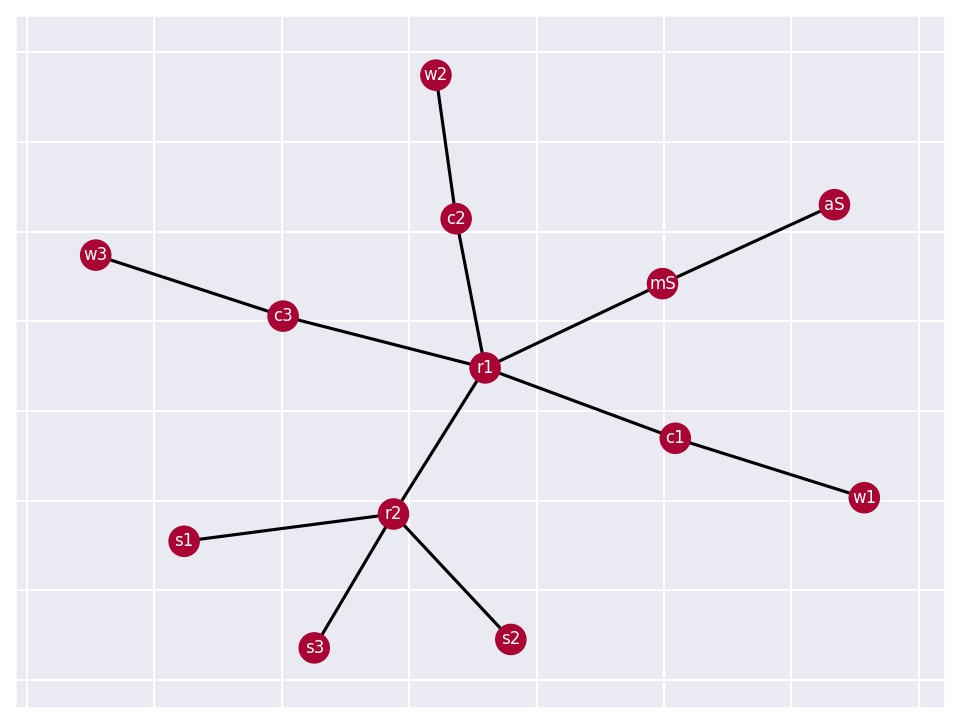

In [7]:
%pip install networkx pygraphviz
import networkx as nx
def visualize_nerlnet_graph(api_server_inst,  connections : dict , components): # connections is a dictionary with keys as routers and values as lists of their neighbors
    print("Connections: " , list(connections.items()))
    routers = list(connections.keys())
    print("Routers: " , routers)
    workers = list(components.map_worker_to_client.keys())
    print("Workers: " , workers)
    graph = nx.Graph()
    nodes = routers + components.sources + components.clients + workers + [API_SERVER_STR , MAIN_SERVER_STR]
    edges = [] # list of tuples
    for router , neighbors in list(connections.items()):
        for neighbor in neighbors:
            if (router,neighbor) not in edges:
                print(f"Adding edge ({router} , {neighbor}) to graph")
                edges.append((router , neighbor))
    edges.append((API_SERVER_STR , MAIN_SERVER_STR)) # Always connected
    for worker in workers:
        edges.append((worker , components.map_worker_to_client[worker]))
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)
    
    my_labels = {'mainServer': 'mS' , 'apiServer': 'aS'}
    nx.relabel_nodes(graph, my_labels , copy=False)
    
    default_colors = {node:'#A90433' for node in graph.nodes()}
    node_colors = {node:default_colors[node] for node in graph.nodes()}
    nx.set_node_attributes(graph, node_colors, 'color')
    colors = nx.get_node_attributes(graph, 'color').values()

    pos = nx.nx_agraph.graphviz_layout(graph)
    angle = 100
    
    plt.figure(figsize=(8,6),dpi=150)
    nx.draw_networkx(graph, pos, with_labels=True, node_color=colors , node_size=200, font_size=8, font_color='white' , edge_color='black' , width=1.5)
    plt.show()
visualize_nerlnet_graph(API , API.json_dir_parser.json_from_path(conn_path)['connectionsMap'] , globe.components)

In [8]:
API.send_jsons_to_devices()

[INFO][2024-07-17 19:10:47,687] Sending distributed configurations to devices is completed


In [9]:
API.run_current_experiment_phase()

[INFO][2024-07-17 19:10:47,694] Experiment phase: training1_phase of type training starts running...
[INFO][2024-07-17 19:10:47,697] Sending data to sources
[INFO][2024-07-17 19:10:51,919] Data is ready in sources
[INFO][2024-07-17 19:10:51,922] Phase training requested from Main Server
[INFO][2024-07-17 19:15:13,678] Processing experiment phase data
[INFO][2024-07-17 19:15:13,689] Processing experiment phase data completed
[INFO][2024-07-17 19:15:13,690] Start generating communication statistics for training1_phase of type training
[INFO][2024-07-17 19:15:13,690] Statistics requested from Main Server
[INFO][2024-07-17 19:15:14,097] Statistics received from Main Server
[INFO][2024-07-17 19:15:14,098] Phase of training1_phase training completed


In [10]:
stats_train1 = API.get_experiment_flow(exp_name).generate_stats()

,w2,w1,w3
0,0.333333,0.333333,0.333333
1,0.333333,0.288889,0.333333
2,0.444444,0.222222,0.444444
3,0.555556,0.288889,0.444444
4,0.555556,0.333333,0.333333
...,...,...,...
395,0.000000,0.000000,NaN
396,0.000000,0.000000,NaN
397,0.000000,0.000000,NaN
398,0.000000,0.000000,NaN


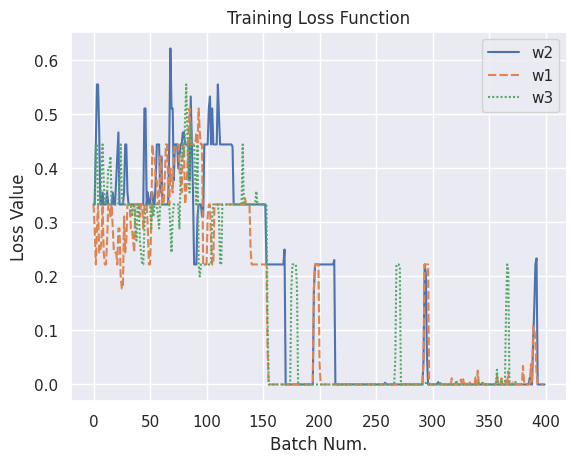

In [11]:
stats_train1.get_loss_ts(plot=True)

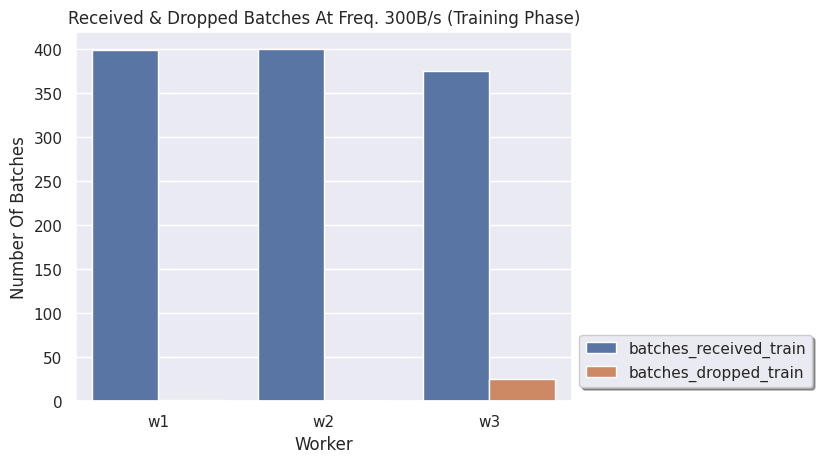

In [12]:
import pandas as pd
workers_comm_dict = stats_train1.get_communication_stats_workers()
df_train = pd.DataFrame.from_dict(workers_comm_dict)
plt.figure()
df_selected_train = df_train.iloc[[3,5]]
data_train = pd.melt(df_selected_train.reset_index(), id_vars=['index'], value_vars=df_train.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data_train)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 300B/s (Training Phase)")

batches_stats.legend(loc='upper right', bbox_to_anchor=(1.5, 0.2), shadow=True, ncol=1)
plt.show()


In [13]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-07-17 19:15:14,875] Experiment phase: training2_phase of type training starts running...
[INFO][2024-07-17 19:15:14,876] Sending data to sources
[INFO][2024-07-17 19:15:17,295] Data is ready in sources
[INFO][2024-07-17 19:15:17,296] Phase training requested from Main Server
[INFO][2024-07-17 19:19:42,550] Processing experiment phase data
[INFO][2024-07-17 19:19:42,558] Processing experiment phase data completed
[INFO][2024-07-17 19:19:42,558] Start generating communication statistics for training2_phase of type training
[INFO][2024-07-17 19:19:42,560] Statistics requested from Main Server
[INFO][2024-07-17 19:19:43,014] Statistics received from Main Server
[INFO][2024-07-17 19:19:43,016] Phase of training2_phase training completed


In [14]:
stats_train2 = API.get_experiment_flow(exp_name).generate_stats()

,w3,w1,w2
0,0.222222,0.000000,0.242168
1,0.196487,0.000000,0.181708
2,0.026014,0.002693,0.042752
3,0.003998,0.002748,0.000000
4,0.000000,0.000121,0.000000
...,...,...,...
195,0.000604,0.143519,0.118402
196,0.000614,0.140524,0.115479
197,0.000000,0.137796,0.112059
198,0.000000,0.135014,0.109109


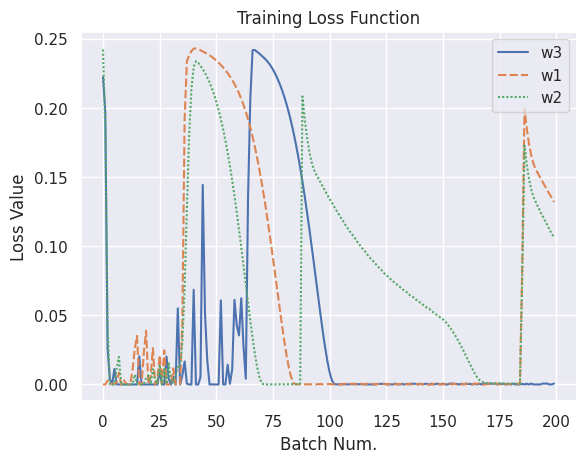

In [15]:
stats_train2.get_loss_ts(plot=True)

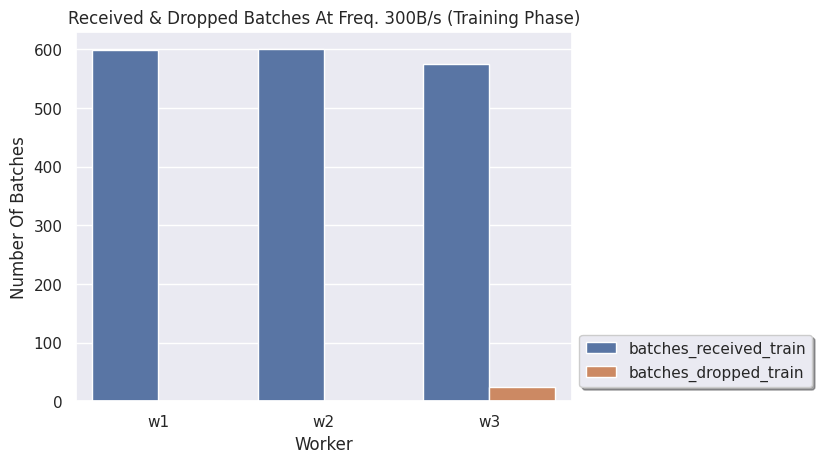

In [16]:
import pandas as pd
workers_comm_dict = stats_train2.get_communication_stats_workers()
df_train = pd.DataFrame.from_dict(workers_comm_dict)
plt.figure()
df_selected_train = df_train.iloc[[3,5]]
data_train = pd.melt(df_selected_train.reset_index(), id_vars=['index'], value_vars=df_train.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data_train)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 300B/s (Training Phase)")

batches_stats.legend(loc='upper right', bbox_to_anchor=(1.5, 0.2), shadow=True, ncol=1)
plt.show()

In [17]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-07-17 19:19:43,648] Experiment phase: training3_phase of type training starts running...
[INFO][2024-07-17 19:19:43,649] Sending data to sources
[INFO][2024-07-17 19:19:45,995] Data is ready in sources
[INFO][2024-07-17 19:19:45,996] Phase training requested from Main Server
[INFO][2024-07-17 19:22:47,656] Processing experiment phase data
[INFO][2024-07-17 19:22:47,664] Processing experiment phase data completed
[INFO][2024-07-17 19:22:47,665] Start generating communication statistics for training3_phase of type training
[INFO][2024-07-17 19:22:47,666] Statistics requested from Main Server
[INFO][2024-07-17 19:22:48,070] Statistics received from Main Server
[INFO][2024-07-17 19:22:48,072] Phase of training3_phase training completed


In [18]:
stats_train3 = API.get_experiment_flow(exp_name).generate_stats()

,w2,w1,w3
0,0.155639,0.129183,0.211099
1,0.150664,0.126760,0.194344
2,0.147625,0.123831,0.180958
3,0.144270,0.121519,0.170628
4,0.141376,0.118992,0.162995
...,...,...,...
195,0.000000,0.000637,0.125988
196,0.000502,0.000000,0.123361
197,0.000000,0.000000,0.120398
198,0.000509,0.000528,0.117852


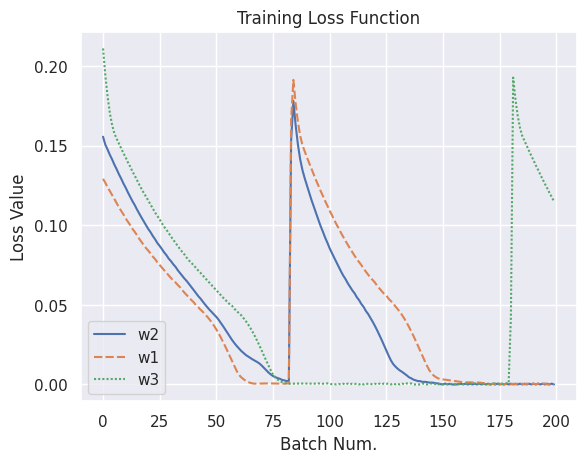

In [19]:
stats_train3.get_loss_ts(plot=True)

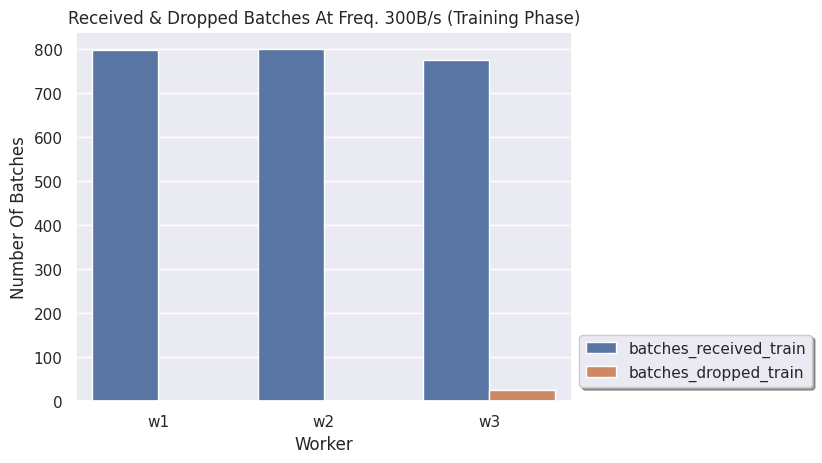

In [20]:
import pandas as pd
workers_comm_dict = stats_train3.get_communication_stats_workers()
df_train = pd.DataFrame.from_dict(workers_comm_dict)
plt.figure()
df_selected_train = df_train.iloc[[3,5]]
data_train = pd.melt(df_selected_train.reset_index(), id_vars=['index'], value_vars=df_train.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data_train)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 300B/s (Training Phase)")

batches_stats.legend(loc='upper right', bbox_to_anchor=(1.5, 0.2), shadow=True, ncol=1)
plt.show()

In [ ]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-07-17 19:33:42,468] Experiment phase: prediction_phase of type prediction starts running...
[INFO][2024-07-17 19:33:42,469] Sending data to sources
[INFO][2024-07-17 19:33:44,941] Data is ready in sources
[INFO][2024-07-17 19:33:44,942] Phase prediction requested from Main Server


In [ ]:
stats_pred = API.get_experiment_flow(exp_name).generate_stats()

In [ ]:
import pandas as pd
workers_comm_dict = stats_train3.get_communication_stats_workers()
df_train = pd.DataFrame.from_dict(workers_comm_dict)
plt.figure()
df_selected_train = df_train.iloc[[3,5]]
data_train = pd.melt(df_selected_train.reset_index(), id_vars=['index'], value_vars=df_train.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data_train)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 300B/s (Training Phase)")

batches_stats.legend(loc='upper right', bbox_to_anchor=(1.5, 0.2), shadow=True, ncol=1)
plt.show()

In [ ]:
conf_mats_sources_workers , conf_mats_workers = stats_pred.get_confusion_matrices(plot=True)